In [2]:
import cv2
import numpy as np
from keras.models import model_from_json

print("DOing gOoD aT iMpOrTs")

DOing gOoD aT iMpOrTs


In [168]:
img1 = r'C:\Users\Thomas\Desktop\MathSolver\FirstModel\TestImages\testimg1.jpg'
img2 = r'C:\Users\Thomas\Desktop\MathSolver\FirstModel\TestImages\testimg2.jpg'

def show_image(image):
    img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    cv2.imshow('image',img)
    c = cv2.waitKey()
    if c >= 0 : return -1
    return 0



In [244]:
symbols_to_class = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,
                    '+':10, '-':11, 'times': 12, 'div':13, '=':14, 'X':15, 'y':16}
class_to_symbols = dict([(val, key) for key, val in symbols_to_class.items()])

In [201]:
img = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)

# Need to play with the min threshhold val. See notes
ret, binary_img = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY_INV)
# Find the contours => if min thresh is o.k then len(contours) == number of symbals in pic
contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# sort contours so we read the symbols from left -> right
cnt=sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0]) 

w, h = int(28), int(28)
rects = []

# boundingRect output: (x, y, width, height), x, y of center of rect
for ctr in cnt:
    x, y, w, h = cv2.boundingRect(ctr)
    rect = [x,y,w,h]
    rects.append(rect)

bool_rect = []
for r in rects:
    l = []
    for rec in rects:
        flag = 0
        if rec != r:
            if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                flag = 1
            l.append(flag)
        if rec == r:
            l.append(0)
    bool_rect.append(l)

dump_rect = []
for i in range(0, len(cnt)):
    for j in range(0, len(cnt)):
        if bool_rect[i][j]==1:
            area1 = rects[i][2]*rects[i][3]
            area2 = rects[j][2]*rects[j][3]
            
            if area1==min(area1, area2):
                dump_rect.append(rects[i])

final_rect=[i for i in rects if i not in dump_rect]

processed = []
for r in rects:
    x, y, w, h = r[0], r[1], r[2], r[3]
    img_crop = thresh[y:y+h+10, x:x+w+10]
    img_resize = cv2.resize(img_crop, (28,28))
    processed.append(img_resize)

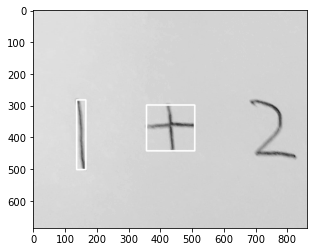

In [173]:
#img_w_contours = cv2.drawContours(img, testctr, -1, (0,255,0), 3)

import matplotlib.pyplot as plt

plt.close(1);plt.figure(1)
plt.imshow(rect1, cmap = 'gray')
plt.show()

In [235]:
with open(r'basic_model.json', 'r') as json_file:
    json_model = json_file.read()
    
model = model_from_json(json_model)
model.load_weights('basic_model_weights.h5')

In [239]:
results = []
for symbol in processed:
    symbol = symbol.reshape(1, 28, 28, 1) # Model is channel last format
    result = model.predict_classes(symbol)
    results.append(result)

C:\Users\Thomas\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [253]:
expression = ''
for i in results:
    res = class_to_symbols[i[0]]
    expression += res
    
ans = eval(expression)

In [257]:
print('The expression in the picture is '+expression)
print('Mr Computer says that '+expression+'='+str(ans))

The expression in the picture is 1+2
Mr Computer says that 1+2=3
